# Data Preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/training.csv", delimiter=',')

In [3]:
df.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE


* The number of classes in the dataset

In [4]:
df.CHURNED.unique()

array(['STAY', 'LEAVE'], dtype=object)

### From String to Binary Data

In [5]:
def stringTobinaryData(strToCompare, strRef):
    """ This function transforms the data from string valued to binary based on strRef. In this implementation, we have choosen
        that strings strRef will be  class 1)"""
    
    if strToCompare == strRef :
        return 1
    return 0    

In [6]:
# we apply stringTobinaryData() to the target.
strRef = "STAY"
df.CHURNED = df.CHURNED.apply(lambda x : stringTobinaryData(x, strRef))

In [7]:
df.CHURNED.unique()

array([1, 0], dtype=int64)

In [8]:
df.COLLEGE.unique()

array(['zero', 'one'], dtype=object)

In [9]:
# we apply stringTobinaryData() to the COLLEGE feature.
strRef = "one"
df.COLLEGE = df.COLLEGE.apply(lambda x : stringTobinaryData(x, strRef))

In [10]:
df.COLLEGE.unique()

array([0, 1], dtype=int64)

#### Upsampling ?

In [11]:
churned = df[df.CHURNED == 1]
len(churned)

7612

In [12]:
fidele = df[df.CHURNED == 0]
len(fidele)

4369

In [13]:
len(df)

11981

In [14]:
from sklearn.utils import resample,shuffle
upsampledFidele = resample(fidele,replace = True,n_samples=7612)

In [15]:
len(upsampledFidele)

7612

In [16]:
df = pd.concat([churned,upsampledFidele])
df = shuffle(df)

In [17]:
churned = df[df.CHURNED == 1]
fidele = df[df.CHURNED == 0]
print(len(fidele))
print(len(churned))

7612
7612


### Dealing with outliers

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [19]:
def plotHistograms(df):
    
    # We get only numerical columns
    columns = df.select_dtypes(include=np.number).columns.tolist()
    
    for column in columns :
        if column == 'CUSTOMER_ID':
            continue
        plt.hist(df[column])
        plt.title(column)
        plt.show()

def deleteAllOutliers(df):
    # We get only numerical columns
    columns = df.select_dtypes(include=np.number).columns.tolist()
    
    for column in columns :
        if column == 'CUSTOMER_ID' or column == 'COLLEGE' or column == 'CHURNED':
            continue
        df = deleteOutliers(df, column)
        
    return df

def deleteOutliers(df, columnName):
    q_low = df[columnName].quantile(0.01)
    q_hi  = df[columnName].quantile(0.99)
    df_filtered = df[(df[columnName] < q_hi) & (df[columnName] > q_low)]
    
    return df_filtered

In [20]:
df.describe()

,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,CHURNED
count,15224.000000,15224.000000,15224.000000,15224.000000,15224.000000,14417.000000,15224.000000,15224.000000,15224.000000,15224.000000,15224.000000,15224.000000,15224.000000,15224.000000
mean,0.497307,513.646643,48611.738242,85.782186,24.158368,492995.793785,2.072057,2.497438,155.678994,387.865738,8.065489,3.085418,5.985024,0.500000
std,0.500009,460.798595,22719.542417,85.920805,26.987794,253125.743634,1.248212,1.116539,47.807336,212.633336,8.968768,1.661755,4.407096,0.500016
min,0.000000,0.000000,10032.500000,-2.000000,0.000000,150015.000000,0.000000,1.000000,50.000000,130.000000,0.000000,0.300000,1.000000,0.000000
25%,0.000000,187.500000,30006.500000,0.000000,0.000000,263876.000000,1.000000,2.000000,122.000000,219.000000,1.000000,1.900000,2.000000,0.000000
50%,0.000000,367.758884,45843.500000,59.000000,15.000000,450249.000000,2.000000,2.000000,149.000000,325.000000,4.000000,2.700000,5.000000,0.500000
75%,1.000000,697.277885,66847.500000,179.000000,43.000000,699052.000000,3.000000,3.000000,182.000000,530.000000,15.000000,3.800000,10.000000,1.000000
max,1.000000,6600.000000,105355.500000,298.000000,89.000000,999996.000000,7.000000,4.000000,521.000000,899.000000,29.000000,21.000000,15.000000,1.000000


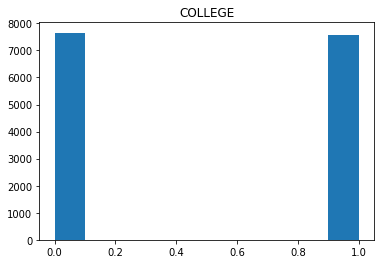

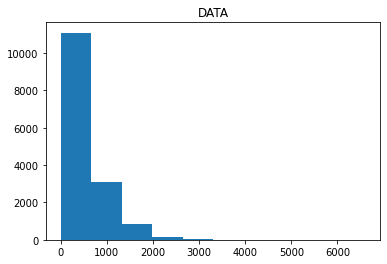

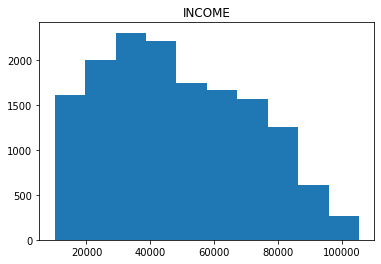

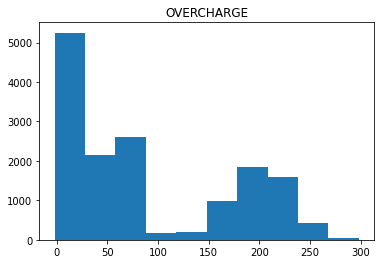

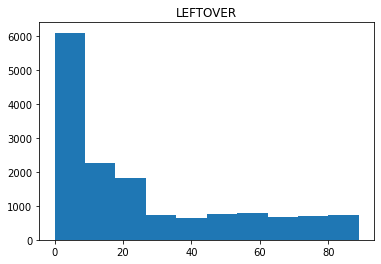

C:\Python36\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python36\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


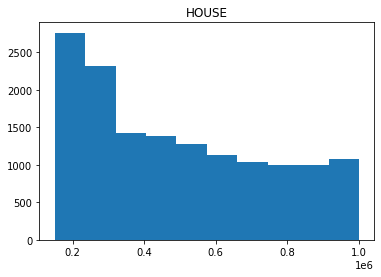

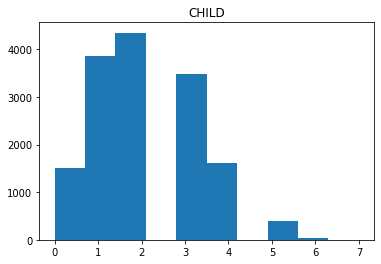

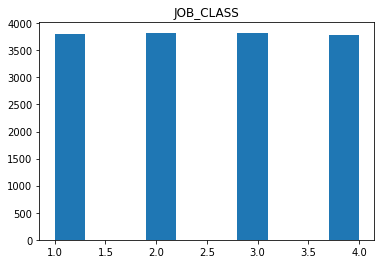

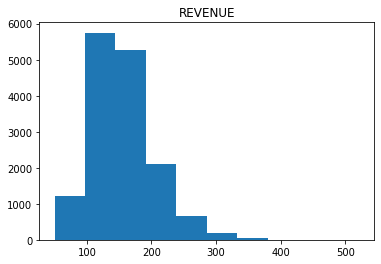

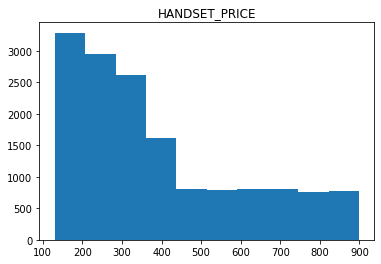

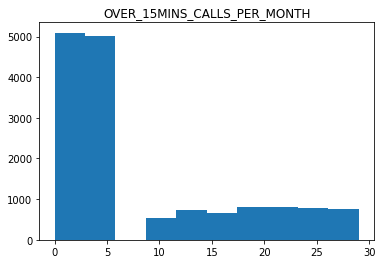

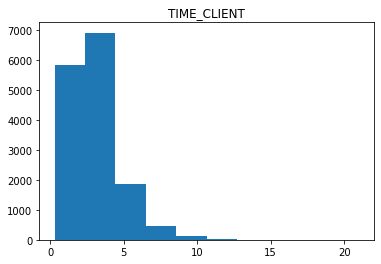

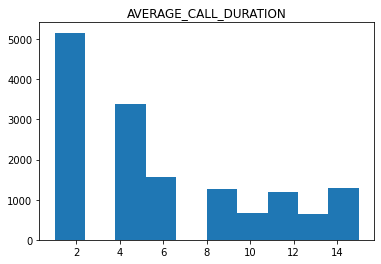

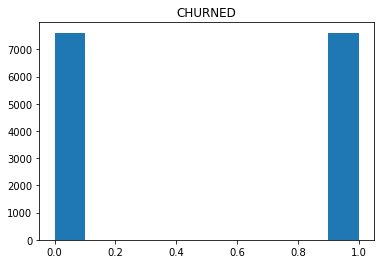

In [21]:
plotHistograms(df)

In [22]:
#df = deleteAllOutliers(df)
#df = deleteOutliers(df, 'DATA')
#df = deleteOutliers(df, 'INCOME')

In [23]:
len(df)

15224

### We will know deal with NaN values

In [24]:
def replaceNaNValues(df, columnName, isQualitative) :
    print('------ BEFORE REPLACING : ', df[columnName].isna().sum(), ' NAN VALUES')
    if isQualitative :
        x = df[columnName].mode()
        print("[INFO] NaN values will be replaced by the mode value : ", x)

    else :
        x = df[columnName].mean()
        print("[INFO] NaN values will be replaced by the mean value : ", x)
        
    for index, row in df.iterrows():
        if pd.isna(row[columnName]) :
            df.loc[index, columnName] = x[0]
    
    print('------ AFTER REPLACING : ', df[columnName].isna().sum(), ' NAN VALUES')

In [25]:
df.isna().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          807
LESSTHAN600k                   807
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64

In [26]:
df.HOUSE.unique()

array([754740., 822212., 283824., ..., 899386., 215463., 832557.])

In [27]:
df.LESSTHAN600k.unique()

array([False, True, nan], dtype=object)

In [28]:
replaceNaNValues(df, "LESSTHAN600k", 1)

------ BEFORE REPLACING :  807  NAN VALUES
[INFO] NaN values will be replaced by the mode value :  0    True
dtype: object
------ AFTER REPLACING :  0  NAN VALUES


In [29]:
replaceNaNValues(df, "HOUSE", 1)

------ BEFORE REPLACING :  807  NAN VALUES
[INFO] NaN values will be replaced by the mode value :  0    938719.0
dtype: float64
------ AFTER REPLACING :  0  NAN VALUES


In [30]:
df.LESSTHAN600k.unique()

array([False,  True])

In [31]:
df.isna().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURNED                        0
dtype: int64

* We can see that we no longer have a NaN value.

In [32]:
df.describe

<bound method NDFrame.describe of       CUSTOMER_ID  COLLEGE         DATA   INCOME  OVERCHARGE  LEFTOVER  \
7876      C110482        1   384.146341  28185.0          64         0   
334       C100453        1   191.666667  54523.0           0        62   
8101      C110797        0   118.210863  90988.5         199        64   
11951     C115929        0  1320.000000  24116.0           0        49   
551       C100741        1   144.171779  90931.5         208        67   
...           ...      ...          ...      ...         ...       ...   
1624      C102181        1   130.120482  36340.5         205        11   
3813      C105091        0  1500.000000  55229.0          48         9   
3139      C104206        1   143.769968  17636.0          69        77   
11350     C115120        1   144.994246  17643.0          49        72   
5761      C107695        1   124.694377  19600.0          69        24   

          HOUSE  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
78

# Data analysis - Getting insight from the data

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df.corr()

,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,CHURNED
COLLEGE,1.000000,-0.003367,-0.005923,-0.008035,0.013129,-0.007078,0.007958,-0.005741,-0.004719,0.019073,-0.006855,-0.000407,-0.003344,-0.009349,-0.004598
DATA,-0.003367,1.000000,-0.143581,-0.378966,-0.260438,-0.024000,0.029258,-0.258937,-0.017882,0.007507,0.012316,-0.281562,0.524207,0.253549,-0.062151
INCOME,-0.005923,-0.143581,1.000000,0.389823,0.018202,0.000079,-0.005719,-0.001608,-0.005935,0.009811,0.671826,0.296636,0.004315,-0.018462,-0.170699
OVERCHARGE,-0.008035,-0.378966,0.389823,1.000000,0.003396,0.003646,-0.007204,0.005215,-0.001347,0.008480,-0.003079,0.766262,-0.008074,0.011229,-0.227127
LEFTOVER,0.013129,-0.260438,0.018202,0.003396,1.000000,-0.004126,0.003757,-0.001716,0.006090,-0.012059,0.021627,-0.012942,0.003166,-0.662032,-0.057600
HOUSE,-0.007078,-0.024000,0.000079,0.003646,-0.004126,1.000000,-0.731725,0.017601,0.004045,-0.004222,0.001934,0.011635,0.012896,-0.008279,0.186898
LESSTHAN600k,0.007958,0.029258,-0.005719,-0.007204,0.003757,-0.731725,1.000000,-0.008093,-0.009955,0.005799,0.010159,-0.004688,-0.017282,0.011536,-0.234082
CHILD,-0.005741,-0.258937,-0.001608,0.005215,-0.001716,0.017601,-0.008093,1.000000,0.012317,0.001170,-0.007836,0.001233,-0.006185,0.002441,-0.002684
JOB_CLASS,-0.004719,-0.017882,-0.005935,-0.001347,0.006090,0.004045,-0.009955,0.012317,1.000000,-0.007834,-0.007365,0.005524,-0.011534,-0.000662,0.018885
REVENUE,0.019073,0.007507,0.009811,0.008480,-0.012059,-0.004222,0.005799,0.001170,-0.007834,1.000000,-0.008126,-0.005292,-0.020329,-0.001256,-0.013747


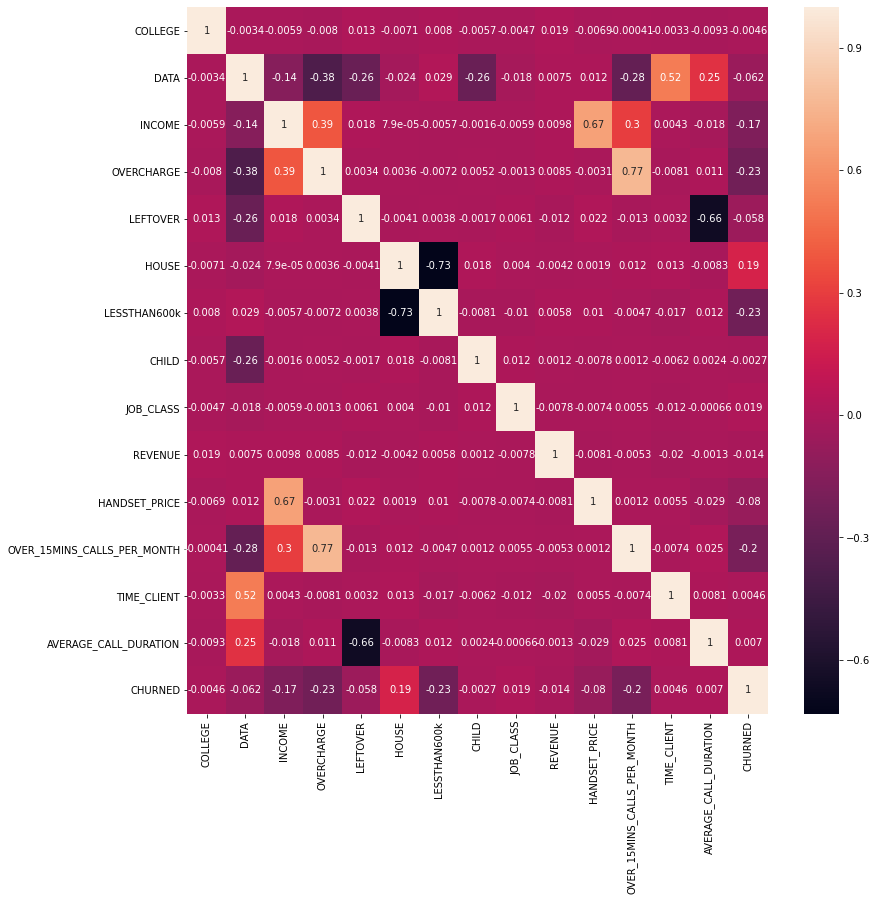

In [35]:
corrMatrix = df.corr()
plt.subplots(figsize=(13,13))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Creating X, Y (features, target)

In [36]:
df.columns

Index(['CUSTOMER_ID', 'COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'LESSTHAN600k', 'CHILD', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')

In [37]:
X = df[['COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'LESSTHAN600k', 'CHILD', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']]
y = df[['CHURNED']]

In [38]:
X = df[['COLLEGE', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'LESSTHAN600k', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']]
y = df[['CHURNED']]

## OneHot Encoding

In [39]:
to_dummify = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
X = pd.get_dummies(X, columns=to_dummify)

In [40]:
X.head()

,COLLEGE,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
7876,1,28185.0,64,0,754740.0,False,3,116.0,145,5,...,0,0,0,1,0,0,1,0,0,0
334,1,54523.0,0,62,822212.0,False,4,256.0,370,0,...,0,0,1,0,0,1,0,0,0,0
8101,0,90988.5,199,64,283824.0,True,2,81.0,544,4,...,0,0,0,1,0,0,1,0,0,0
11951,0,24116.0,0,49,552585.0,True,3,162.0,206,1,...,0,0,0,1,0,0,1,0,0,0
551,1,90931.5,208,67,185951.0,True,1,80.0,527,28,...,0,0,1,0,0,0,0,0,1,0


In [41]:
datasetColumns = X.columns

# Scaling the Data

In [42]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

In [43]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_sacled = scaler.fit_transform(X)

In [44]:
X = DataFrame(X_sacled, columns=datasetColumns)

In [45]:
X

,COLLEGE,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1.0,0.190431,0.220000,0.000000,0.711457,0.0,0.666667,0.140127,0.019506,0.172414,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.466734,0.006667,0.696629,0.790838,0.0,1.000000,0.437367,0.312094,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.849281,0.670000,0.719101,0.157426,1.0,0.333333,0.065817,0.538362,0.137931,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.147745,0.006667,0.550562,0.473622,1.0,0.666667,0.237792,0.098830,0.034483,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.848683,0.700000,0.752809,0.042279,1.0,0.000000,0.063694,0.516255,0.965517,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15219,1.0,0.275988,0.690000,0.123596,0.629971,0.0,0.666667,0.087049,0.665800,0.344828,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15220,0.0,0.474141,0.166667,0.101124,0.784218,0.0,0.666667,0.199575,0.654096,0.172414,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15221,1.0,0.079766,0.236667,0.865169,0.881633,0.0,1.000000,0.242038,0.582575,0.103448,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15222,1.0,0.079839,0.170000,0.808989,0.076999,1.0,0.333333,0.259023,0.055917,0.137931,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Train and test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
#DataConversionWarning
y = y.to_numpy().ravel()

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model building

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import Pool, CatBoostClassifier, cv

In [50]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#### To ignore FutureWarning

In [51]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
def trainAndScore(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('[TEST] SCORE =  ',score)
    print()
    testModel(model)
    return model
    
def testModel(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print()
    print('[TEST] AUPRC = ', roc_auc_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    
def plotFeatureImportance(model):
    fig = plt.figure(figsize = (14, 9))
    ax = fig.add_subplot(111)

    colours = plt.cm.Set1(np.linspace(0, 1, 9))

    ax = plot_importance(model, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax);
    
    for axis in ['top','bottom','left','right']:
                ax.spines[axis].set_linewidth(2)

    ax.set_xlabel('importance score', size = 16)
    ax.set_ylabel('features', size = 16)
    ax.set_yticklabels(ax.get_yticklabels(), size = 12)
    ax.set_title('Ordering of features by importance to the model learnt', size = 20)

## Naive Bayes

In [53]:
model = MultinomialNB()
model = trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.6663382594417078

[[1115  410]
 [ 606  914]]

[TEST] AUPRC =  0.6662316652286454
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1525
           1       0.69      0.60      0.64      1520

    accuracy                           0.67      3045
   macro avg       0.67      0.67      0.66      3045
weighted avg       0.67      0.67      0.66      3045



In [558]:
model = GaussianNB()
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.6600985221674877

[[1077  423]
 [ 612  933]]

[TEST] AUPRC =  0.6609417475728155
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1500
           1       0.69      0.60      0.64      1545

    accuracy                           0.66      3045
   macro avg       0.66      0.66      0.66      3045
weighted avg       0.66      0.66      0.66      3045



GaussianNB(priors=None, var_smoothing=1e-09)

## Stochastic Gradient Descent Classifier 

In [559]:
model = SGDClassifier()
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.6781609195402298

[[1165  335]
 [ 645  900]]

[TEST] AUPRC =  0.6795954692556633
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1500
           1       0.73      0.58      0.65      1545

    accuracy                           0.68      3045
   macro avg       0.69      0.68      0.68      3045
weighted avg       0.69      0.68      0.68      3045



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Random Forest Classifier

In [462]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [40, 200],
    'max_depth' : [10, 70],
    'min_samples_leaf': [20, 50],
    'min_samples_split': [10, 45],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#y_np = y.to_numpy().ravel()

CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [560]:
model = RandomForestClassifier(n_estimators = 200, max_depth= 70 , max_features='auto', criterion='gini', 
                               min_samples_leaf=20, min_samples_split=10)
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.741871921182266

[[1180  320]
 [ 466 1079]]

[TEST] AUPRC =  0.7425242718446602
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1500
           1       0.77      0.70      0.73      1545

    accuracy                           0.74      3045
   macro avg       0.74      0.74      0.74      3045
weighted avg       0.74      0.74      0.74      3045



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [561]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.95 %
Standard Deviation: 0.93 %


## Logistic Regression

In [562]:
model = LogisticRegression()
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.6791461412151067

[[1083  417]
 [ 560  985]]

[TEST] AUPRC =  0.6797702265372167
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1500
           1       0.70      0.64      0.67      1545

    accuracy                           0.68      3045
   macro avg       0.68      0.68      0.68      3045
weighted avg       0.68      0.68      0.68      3045



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## SVM

In [563]:
model = SVC(gamma='auto')
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.6679802955665025

[[1111  389]
 [ 622  923]]

[TEST] AUPRC =  0.6690388349514563
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1500
           1       0.70      0.60      0.65      1545

    accuracy                           0.67      3045
   macro avg       0.67      0.67      0.67      3045
weighted avg       0.67      0.67      0.67      3045



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## K-Nearest Neighbors

In [564]:
model = KNeighborsClassifier(n_neighbors=43) 
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.671264367816092

[[1061  439]
 [ 562  983]]

[TEST] AUPRC =  0.671789644012945
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1500
           1       0.69      0.64      0.66      1545

    accuracy                           0.67      3045
   macro avg       0.67      0.67      0.67      3045
weighted avg       0.67      0.67      0.67      3045



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='uniform')

In [565]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 67.62 %
Standard Deviation: 1.27 %


# Gradient Boosting Classifier

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [55]:
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

In [58]:
# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,20,40,50]
    }

In [ ]:
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=5, n_jobs=-1)

clf.fit(X, y)

print(clf.best_params_)

In [566]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=8)
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.8266009852216749

[[1345  155]
 [ 373 1172]]

[TEST] AUPRC =  0.8276213592233009
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1500
           1       0.88      0.76      0.82      1545

    accuracy                           0.83      3045
   macro avg       0.83      0.83      0.83      3045
weighted avg       0.83      0.83      0.83      3045



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
plotFeatureImportance(model)

##  XGBoost

In [567]:
model = XGBClassifier()
trainAndScore(model, X_train, y_train, X_test, y_test)

[TEST] SCORE =   0.7175697865353038

[[1144  356]
 [ 504 1041]]

[TEST] AUPRC =  0.7182265372168284
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1500
           1       0.75      0.67      0.71      1545

    accuracy                           0.72      3045
   macro avg       0.72      0.72      0.72      3045
weighted avg       0.72      0.72      0.72      3045



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## CatBoost Classifier

In [433]:
model = CatBoostClassifier(eval_metric='Accuracy',random_seed=0)
trainAndScore(model, X_train, y_train, X_test, y_test)

Learning rate set to 0.03399
0:	learn: 0.6998933	total: 265ms	remaining: 4m 24s
1:	learn: 0.7037524	total: 324ms	remaining: 2m 41s
2:	learn: 0.7049840	total: 380ms	remaining: 2m 6s
3:	learn: 0.7113063	total: 438ms	remaining: 1m 49s
4:	learn: 0.7134412	total: 506ms	remaining: 1m 40s
5:	learn: 0.7126201	total: 565ms	remaining: 1m 33s
6:	learn: 0.7117990	total: 626ms	remaining: 1m 28s
7:	learn: 0.7133591	total: 694ms	remaining: 1m 25s
8:	learn: 0.7154939	total: 769ms	remaining: 1m 24s
9:	learn: 0.7149191	total: 829ms	remaining: 1m 22s
10:	learn: 0.7147549	total: 889ms	remaining: 1m 19s
11:	learn: 0.7188603	total: 1.03s	remaining: 1m 24s
12:	learn: 0.7221447	total: 1.13s	remaining: 1m 26s
13:	learn: 0.7221447	total: 1.23s	remaining: 1m 26s
14:	learn: 0.7177929	total: 1.3s	remaining: 1m 25s
15:	learn: 0.7217341	total: 1.36s	remaining: 1m 23s
16:	learn: 0.7209952	total: 1.42s	remaining: 1m 22s
17:	learn: 0.7230479	total: 1.49s	remaining: 1m 21s
18:	learn: 0.7243616	total: 1.54s	remaining: 1m

161:	learn: 0.7498153	total: 11.5s	remaining: 59.6s
162:	learn: 0.7498974	total: 11.6s	remaining: 59.5s
163:	learn: 0.7496510	total: 11.7s	remaining: 59.4s
164:	learn: 0.7493226	total: 11.7s	remaining: 59.3s
165:	learn: 0.7503079	total: 11.8s	remaining: 59.3s
166:	learn: 0.7503079	total: 11.9s	remaining: 59.2s
167:	learn: 0.7504721	total: 11.9s	remaining: 59.1s
168:	learn: 0.7506363	total: 12s	remaining: 59s
169:	learn: 0.7508827	total: 12.1s	remaining: 58.9s
170:	learn: 0.7510469	total: 12.2s	remaining: 58.9s
171:	learn: 0.7508827	total: 12.2s	remaining: 58.9s
172:	learn: 0.7507184	total: 12.3s	remaining: 58.8s
173:	learn: 0.7512111	total: 12.4s	remaining: 58.6s
174:	learn: 0.7510469	total: 12.4s	remaining: 58.6s
175:	learn: 0.7518680	total: 12.5s	remaining: 58.5s
176:	learn: 0.7521964	total: 12.6s	remaining: 58.5s
177:	learn: 0.7524427	total: 12.7s	remaining: 58.5s
178:	learn: 0.7525248	total: 12.7s	remaining: 58.5s
179:	learn: 0.7524427	total: 12.8s	remaining: 58.4s
180:	learn: 0.75

321:	learn: 0.7691929	total: 25.2s	remaining: 53.1s
322:	learn: 0.7687002	total: 25.3s	remaining: 53.1s
323:	learn: 0.7690287	total: 25.4s	remaining: 53.1s
324:	learn: 0.7688644	total: 25.5s	remaining: 53s
325:	learn: 0.7692750	total: 25.6s	remaining: 52.9s
326:	learn: 0.7696855	total: 25.7s	remaining: 52.9s
327:	learn: 0.7693571	total: 25.7s	remaining: 52.8s
328:	learn: 0.7699318	total: 25.9s	remaining: 52.8s
329:	learn: 0.7695213	total: 25.9s	remaining: 52.7s
330:	learn: 0.7700140	total: 26s	remaining: 52.6s
331:	learn: 0.7703424	total: 26.1s	remaining: 52.5s
332:	learn: 0.7705887	total: 26.2s	remaining: 52.4s
333:	learn: 0.7705066	total: 26.3s	remaining: 52.4s
334:	learn: 0.7705887	total: 26.4s	remaining: 52.3s
335:	learn: 0.7705887	total: 26.4s	remaining: 52.3s
336:	learn: 0.7709993	total: 26.5s	remaining: 52.2s
337:	learn: 0.7714098	total: 26.7s	remaining: 52.3s
338:	learn: 0.7712456	total: 26.8s	remaining: 52.3s
339:	learn: 0.7713277	total: 26.9s	remaining: 52.2s
340:	learn: 0.77

481:	learn: 0.7815092	total: 41.1s	remaining: 44.2s
482:	learn: 0.7815092	total: 41.1s	remaining: 44s
483:	learn: 0.7815913	total: 41.2s	remaining: 43.9s
484:	learn: 0.7817555	total: 41.3s	remaining: 43.8s
485:	learn: 0.7819197	total: 41.3s	remaining: 43.7s
486:	learn: 0.7819197	total: 41.4s	remaining: 43.6s
487:	learn: 0.7822481	total: 41.5s	remaining: 43.5s
488:	learn: 0.7824123	total: 41.5s	remaining: 43.4s
489:	learn: 0.7827408	total: 41.6s	remaining: 43.3s
490:	learn: 0.7831513	total: 41.6s	remaining: 43.2s
491:	learn: 0.7832334	total: 41.7s	remaining: 43.1s
492:	learn: 0.7830692	total: 41.8s	remaining: 42.9s
493:	learn: 0.7829871	total: 41.8s	remaining: 42.8s
494:	learn: 0.7829871	total: 41.9s	remaining: 42.7s
495:	learn: 0.7829050	total: 41.9s	remaining: 42.6s
496:	learn: 0.7829871	total: 42s	remaining: 42.5s
497:	learn: 0.7829871	total: 42s	remaining: 42.4s
498:	learn: 0.7829871	total: 42.1s	remaining: 42.3s
499:	learn: 0.7829871	total: 42.2s	remaining: 42.2s
500:	learn: 0.7828

640:	learn: 0.7917727	total: 50.8s	remaining: 28.4s
641:	learn: 0.7916906	total: 50.8s	remaining: 28.3s
642:	learn: 0.7922654	total: 50.9s	remaining: 28.3s
643:	learn: 0.7924296	total: 51s	remaining: 28.2s
644:	learn: 0.7925117	total: 51s	remaining: 28.1s
645:	learn: 0.7927580	total: 51.1s	remaining: 28s
646:	learn: 0.7925938	total: 51.2s	remaining: 27.9s
647:	learn: 0.7925938	total: 51.3s	remaining: 27.9s
648:	learn: 0.7924296	total: 51.4s	remaining: 27.8s
649:	learn: 0.7924296	total: 51.4s	remaining: 27.7s
650:	learn: 0.7924296	total: 51.5s	remaining: 27.6s
651:	learn: 0.7928401	total: 51.6s	remaining: 27.5s
652:	learn: 0.7928401	total: 51.7s	remaining: 27.5s
653:	learn: 0.7928401	total: 51.7s	remaining: 27.4s
654:	learn: 0.7928401	total: 51.8s	remaining: 27.3s
655:	learn: 0.7929222	total: 51.9s	remaining: 27.2s
656:	learn: 0.7931686	total: 52s	remaining: 27.1s
657:	learn: 0.7931686	total: 52.1s	remaining: 27.1s
658:	learn: 0.7939075	total: 52.2s	remaining: 27s
659:	learn: 0.7939897	

801:	learn: 0.8019542	total: 1m 3s	remaining: 15.6s
802:	learn: 0.8019542	total: 1m 3s	remaining: 15.6s
803:	learn: 0.8022826	total: 1m 3s	remaining: 15.5s
804:	learn: 0.8022826	total: 1m 3s	remaining: 15.4s
805:	learn: 0.8019542	total: 1m 3s	remaining: 15.3s
806:	learn: 0.8023647	total: 1m 3s	remaining: 15.2s
807:	learn: 0.8026932	total: 1m 3s	remaining: 15.2s
808:	learn: 0.8027753	total: 1m 3s	remaining: 15.1s
809:	learn: 0.8028574	total: 1m 3s	remaining: 15s
810:	learn: 0.8025289	total: 1m 3s	remaining: 14.9s
811:	learn: 0.8031037	total: 1m 4s	remaining: 14.8s
812:	learn: 0.8032679	total: 1m 4s	remaining: 14.8s
813:	learn: 0.8031858	total: 1m 4s	remaining: 14.7s
814:	learn: 0.8031037	total: 1m 4s	remaining: 14.6s
815:	learn: 0.8031858	total: 1m 4s	remaining: 14.5s
816:	learn: 0.8033500	total: 1m 4s	remaining: 14.4s
817:	learn: 0.8033500	total: 1m 4s	remaining: 14.4s
818:	learn: 0.8032679	total: 1m 4s	remaining: 14.3s
819:	learn: 0.8032679	total: 1m 4s	remaining: 14.2s
820:	learn: 0.

961:	learn: 0.8113146	total: 1m 13s	remaining: 2.92s
962:	learn: 0.8106577	total: 1m 13s	remaining: 2.84s
963:	learn: 0.8106577	total: 1m 13s	remaining: 2.76s
964:	learn: 0.8107398	total: 1m 14s	remaining: 2.69s
965:	learn: 0.8107398	total: 1m 14s	remaining: 2.61s
966:	learn: 0.8113967	total: 1m 14s	remaining: 2.53s
967:	learn: 0.8115609	total: 1m 14s	remaining: 2.45s
968:	learn: 0.8115609	total: 1m 14s	remaining: 2.38s
969:	learn: 0.8114788	total: 1m 14s	remaining: 2.3s
970:	learn: 0.8115609	total: 1m 14s	remaining: 2.22s
971:	learn: 0.8120535	total: 1m 14s	remaining: 2.14s
972:	learn: 0.8122999	total: 1m 14s	remaining: 2.07s
973:	learn: 0.8122999	total: 1m 14s	remaining: 1.99s
974:	learn: 0.8123820	total: 1m 14s	remaining: 1.91s
975:	learn: 0.8128746	total: 1m 14s	remaining: 1.84s
976:	learn: 0.8128746	total: 1m 14s	remaining: 1.76s
977:	learn: 0.8131209	total: 1m 14s	remaining: 1.68s
978:	learn: 0.8131209	total: 1m 14s	remaining: 1.61s
979:	learn: 0.8131209	total: 1m 14s	remaining: 